This file imports a trained BDT model and evaluates it by plotting ROC test and trainig curves, feature distributions, and score distributions for the overall classification and for each individual feature.

In [ ]:
import ROOT
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

loaded_model = xgb.XGBClassifier()
loaded_model.load_model("/eos/user/k/kmonagha/BDT_models/xgb_jet_classifier_5.json")

#load testing data from model training file
X_test = pd.read_pickle("/eos/user/k/kmonagha/BDT_models/X_test_5.pkl")
y_test = pd.read_pickle("/eos/user/k/kmonagha/BDT_models/y_test_5.pkl")
X_train = pd.read_pickle("/eos/user/k/kmonagha/BDT_models/X_train_5.pkl")
y_train = pd.read_pickle("/eos/user/k/kmonagha/BDT_models/y_train_5.pkl")


Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.98      0.97    369691
           1       0.98      0.98      0.98    403347

    accuracy                           0.98    773038
   macro avg       0.98      0.98      0.98    773038
weighted avg       0.98      0.98      0.98    773038

ROC AUC Score: 0.9934948350643743


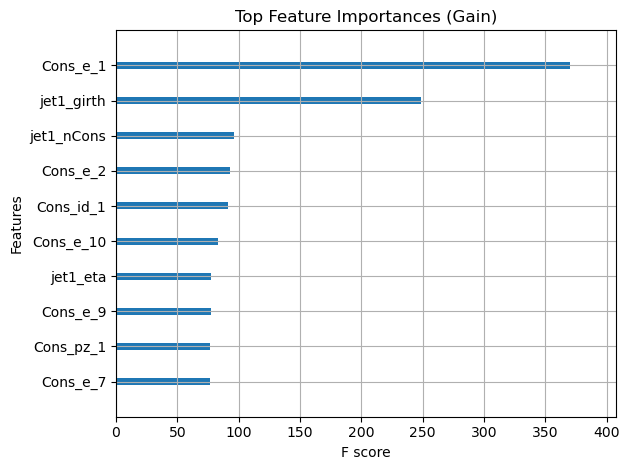

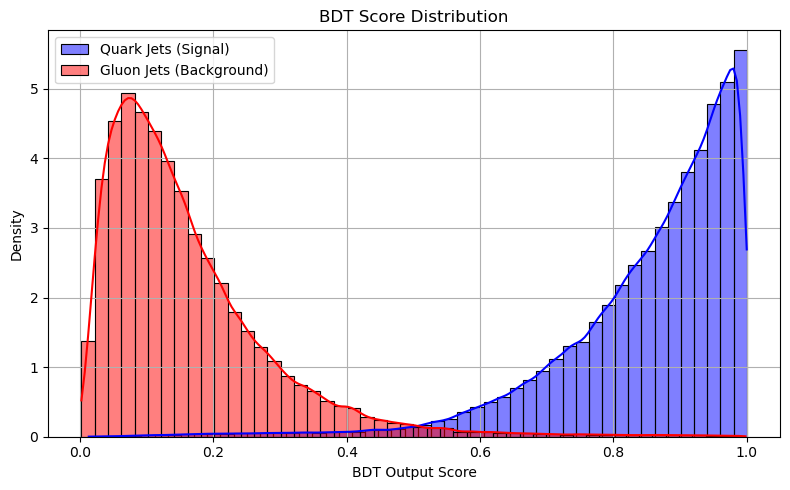

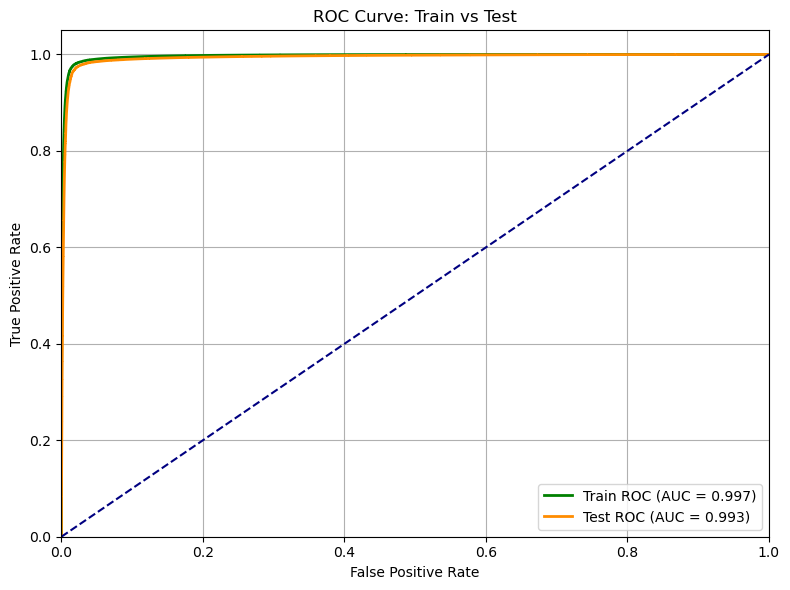

In [ ]:
# --- Evaluation ---
y_pred = loaded_model.predict(X_test)
y_proba = loaded_model.predict_proba(X_test)[:, 1]

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

#Save classification report and ROC AUC score
with open("/eos/user/k/kmonagha/BDT_models/plots/bdt_5_analysis/bdt_5_classification_report.txt", "w") as f:
    f.write("Classification Report:\n")
    f.write(classification_report(y_test, y_pred))
    f.write(f"\nROC AUC Score: {roc_auc_score(y_test, y_proba):.4f}\n")


# --- Plot Feature Importance ---
xgb.plot_importance(loaded_model, importance_type='gain', show_values=False, max_num_features=10)
plt.title("Top Feature Importances (Gain)")
plt.tight_layout()
plt.savefig("/eos/user/k/kmonagha/BDT_models/plots/bdt_5_analysis/bdt_5_feature_importance.png")
plt.show()


# Get BDT scores for both classes
signal_scores = y_proba[y_test == 1]
background_scores = y_proba[y_test == 0]

# Plot
plt.figure(figsize=(8, 5))
sns.histplot(signal_scores, bins=50, label="Quark Jets (Signal)", color="blue", stat="density", kde=True)
sns.histplot(background_scores, bins=50, label="Gluon Jets (Background)", color="red", stat="density", kde=True)
plt.xlabel("BDT Output Score")
plt.ylabel("Density")
plt.title("BDT Score Distribution")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("/eos/user/k/kmonagha/BDT_models/plots/bdt_5_analysis/bdt_5_score_distribution.png")
plt.show()


# Predict probabilities on the training set
y_train_proba = loaded_model.predict_proba(X_train)[:, 1]

# Compute ROC curve and ROC area for test and train
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
roc_auc_train = auc(fpr_train, tpr_train)

# Plot Test and Training ROC

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='green', lw=2, label=f"Train ROC (AUC = {roc_auc_train:.3f})")
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"Test ROC (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], color='navy', lw=1.5, linestyle='--')

# Plot settings
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve: Train vs Test")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.savefig("/eos/user/k/kmonagha/BDT_models/plots/bdt_5_analysis/bdt_5_roc_curve_train_vs_test.png")
plt.show()

In [5]:
print(X_test)

[[32.30253601  3.51021242  8.04953575 16.         10.          0.11673244]
 [34.59766006  2.50883722  7.01784372 15.         10.          0.10584936]
 [44.32630539  2.72164941  7.3272481  17.          8.          0.09182573]
 ...
 [23.01420593  4.13076401  7.63237238 17.         11.          0.19703838]
 [35.81048965  3.27951288  6.85812998  8.          4.          0.07481848]
 [34.233284    4.07546902 11.61431313 27.         13.          0.22515798]]


['jet1_pt', 'jet1_eta', 'jet1_mass', 'jet1_nCons', 'jet1_nChargedCons', 'jet1_girth', 'Cons_px_1', 'Cons_px_2', 'Cons_px_3', 'Cons_px_4', 'Cons_px_5', 'Cons_px_6', 'Cons_px_7', 'Cons_px_8', 'Cons_px_9', 'Cons_px_10', 'Cons_py_1', 'Cons_py_2', 'Cons_py_3', 'Cons_py_4', 'Cons_py_5', 'Cons_py_6', 'Cons_py_7', 'Cons_py_8', 'Cons_py_9', 'Cons_py_10', 'Cons_pz_1', 'Cons_pz_2', 'Cons_pz_3', 'Cons_pz_4', 'Cons_pz_5', 'Cons_pz_6', 'Cons_pz_7', 'Cons_pz_8', 'Cons_pz_9', 'Cons_pz_10', 'Cons_e_1', 'Cons_e_2', 'Cons_e_3', 'Cons_e_4', 'Cons_e_5', 'Cons_e_6', 'Cons_e_7', 'Cons_e_8', 'Cons_e_9', 'Cons_e_10', 'Cons_id_1', 'Cons_id_2', 'Cons_id_3', 'Cons_id_4', 'Cons_id_5', 'Cons_id_6', 'Cons_id_7', 'Cons_id_8', 'Cons_id_9', 'Cons_id_10']
           jet1_pt  jet1_eta  jet1_mass  jet1_nCons  jet1_nChargedCons  \
4448678  32.302536  3.510212   8.049536          16                 10   
5356082  34.597660  2.508837   7.017844          15                 10   
4827226  44.326305  2.721649   7.327248        

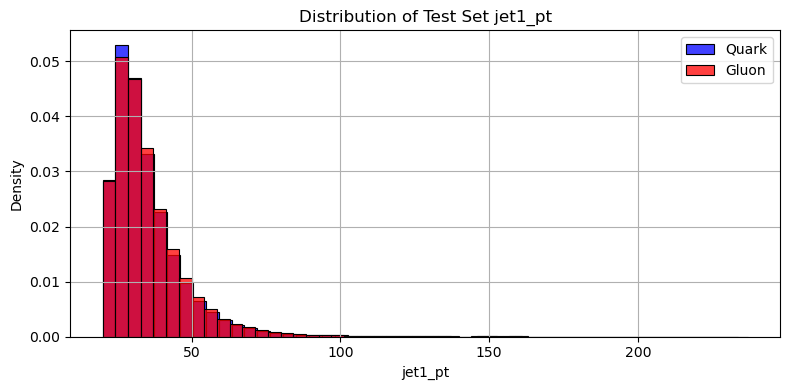

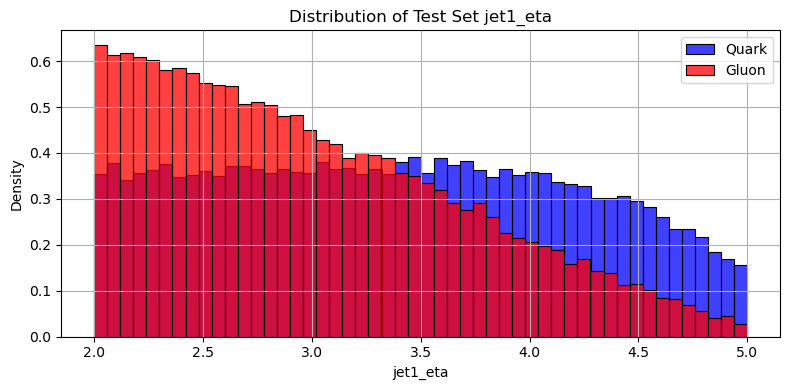

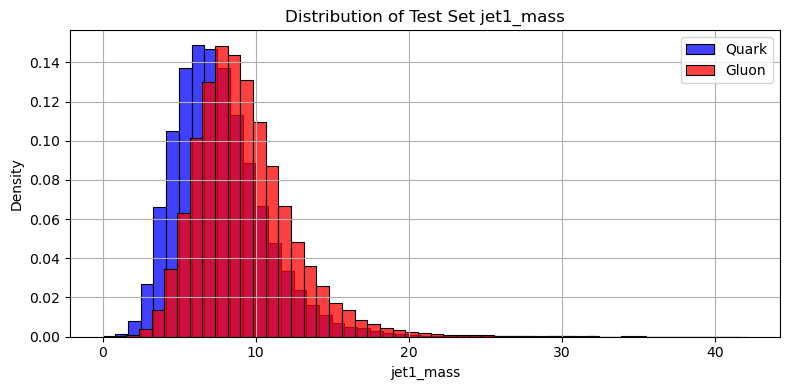

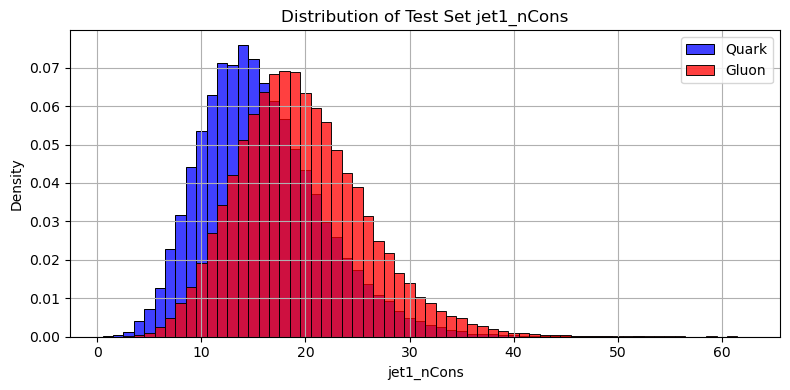

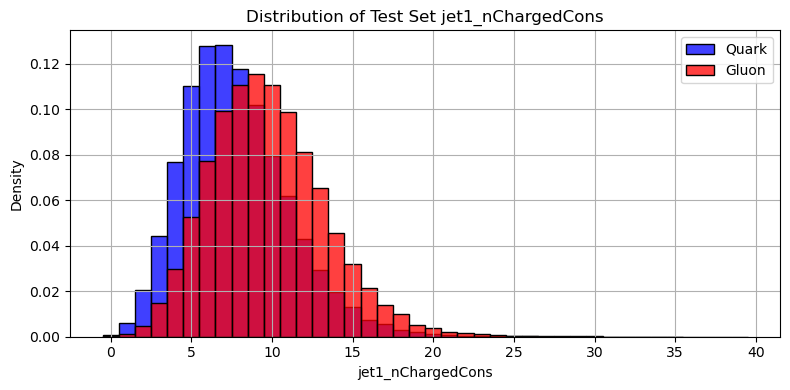

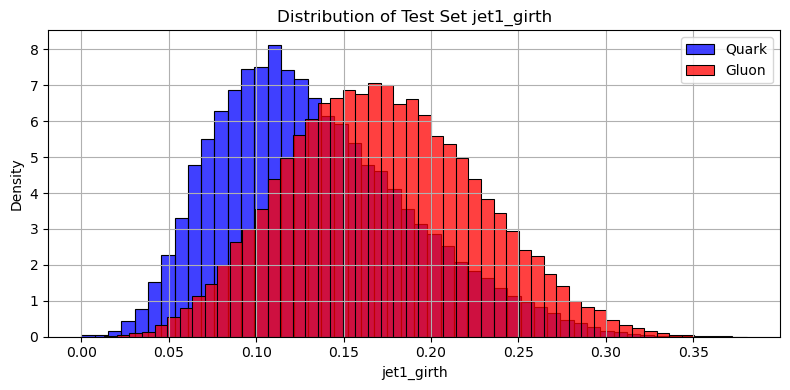

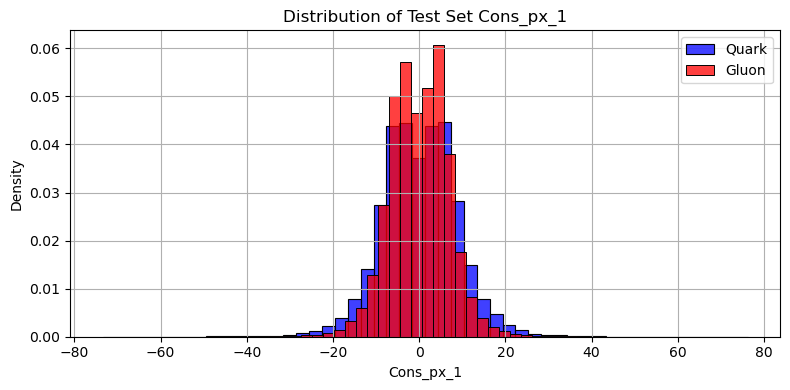

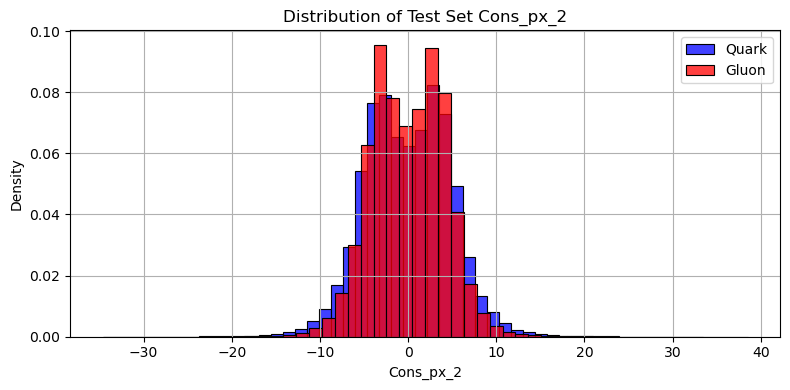

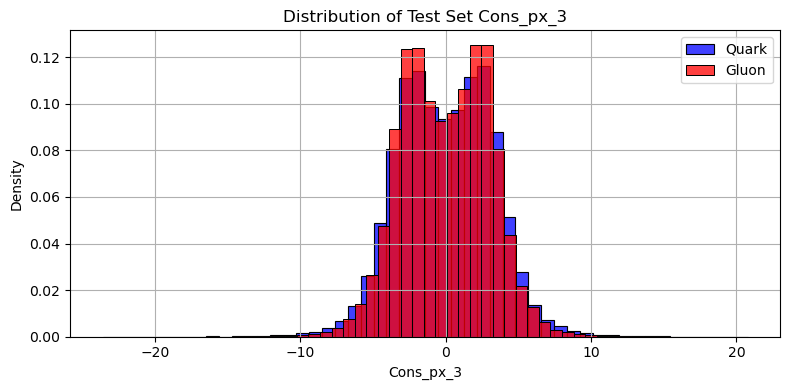

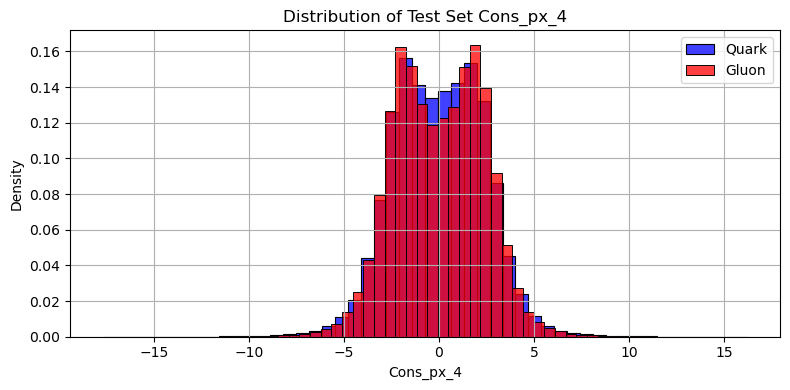

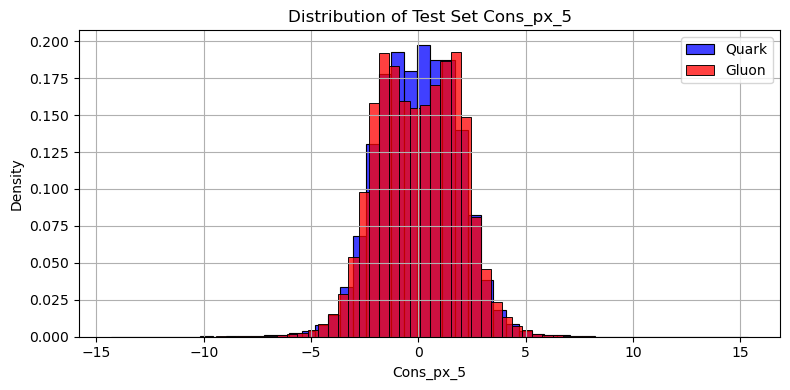

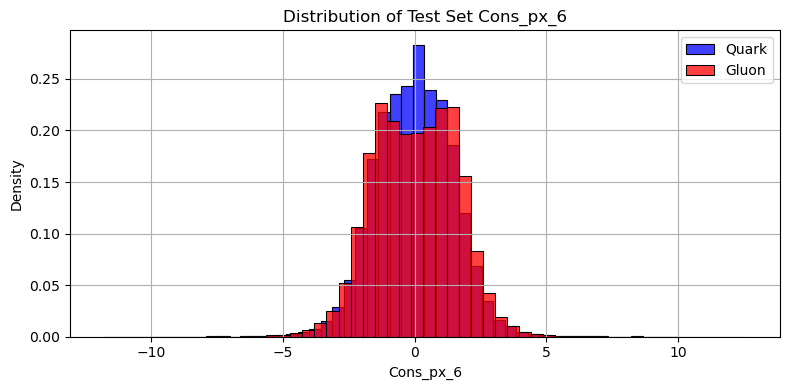

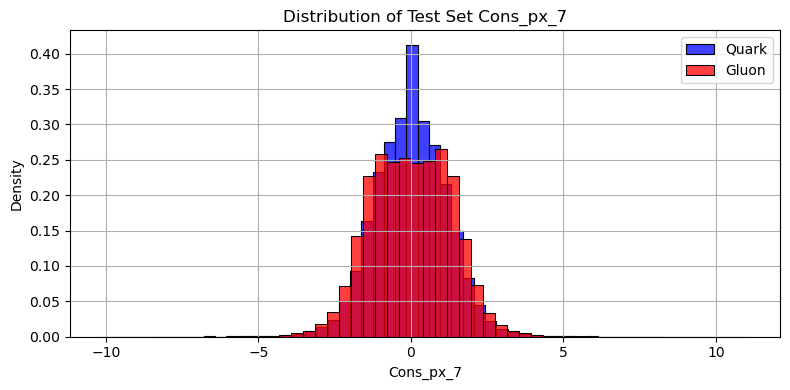

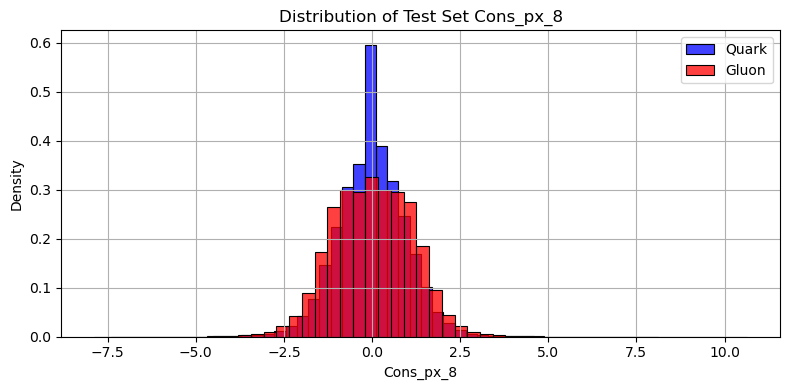

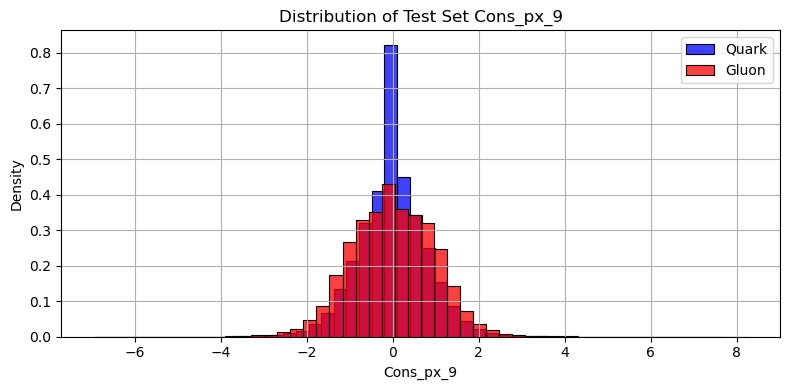

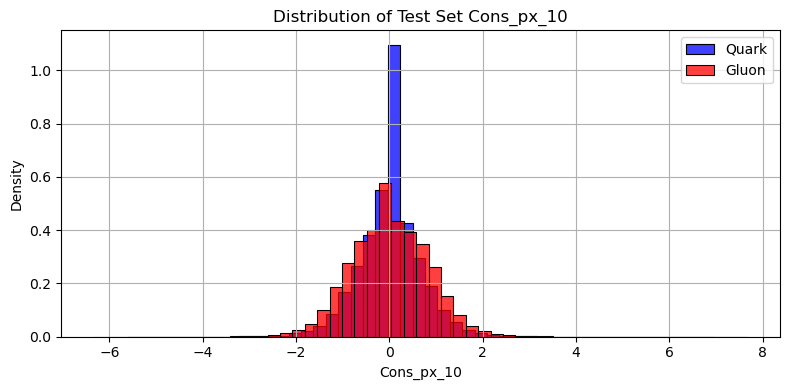

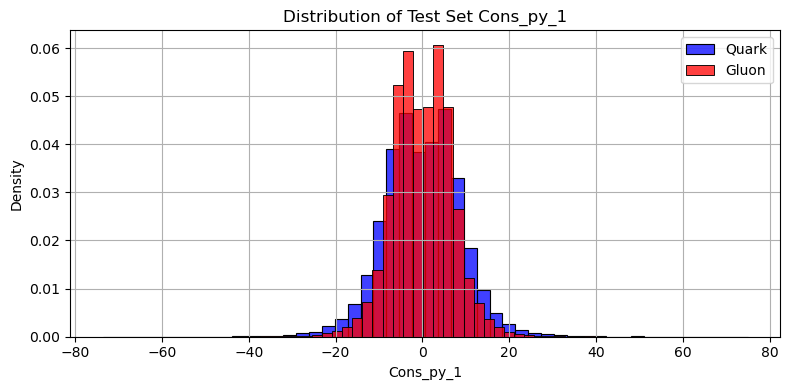

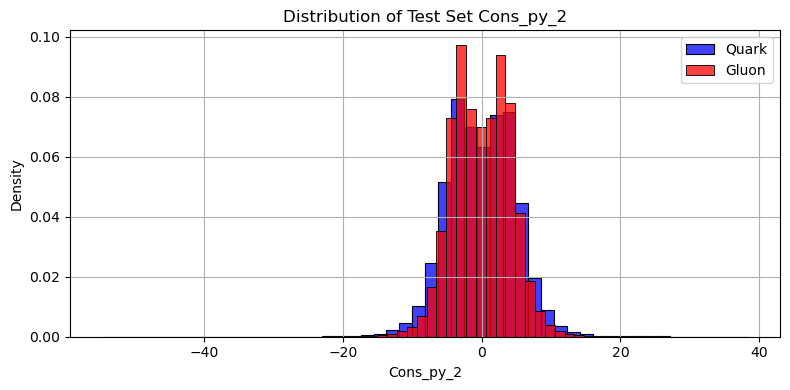

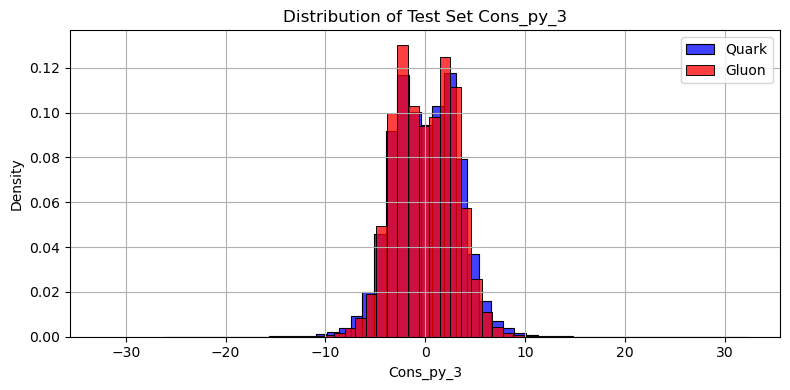

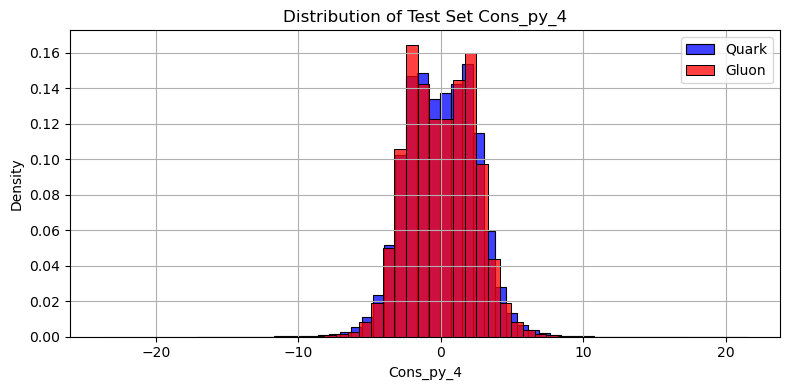

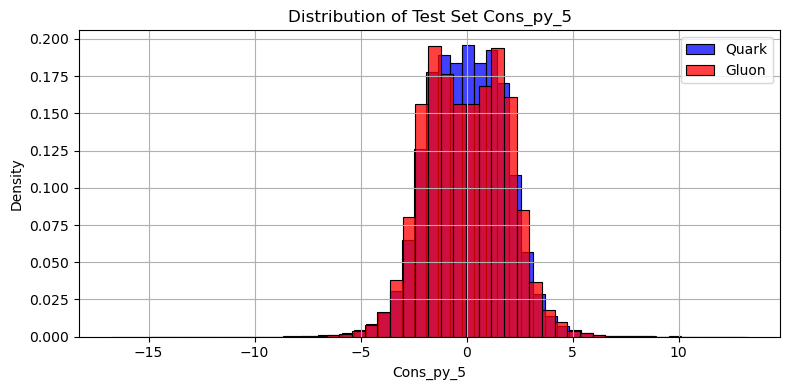

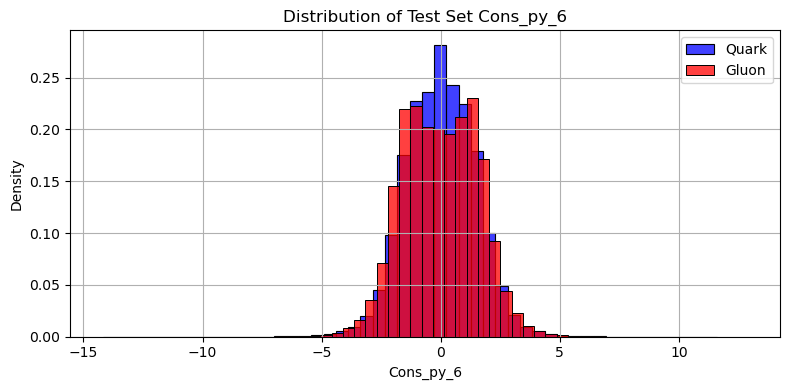

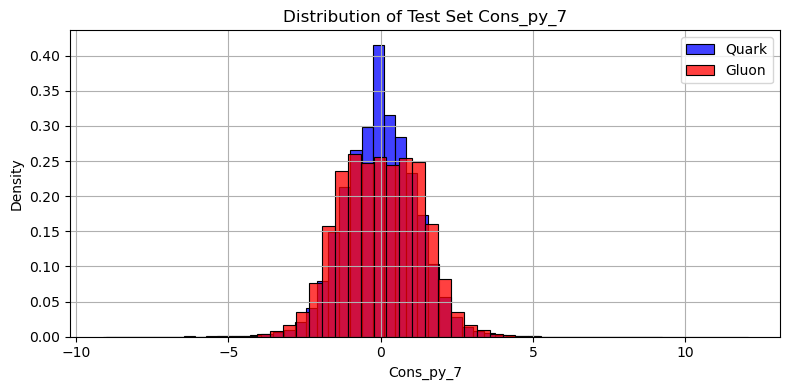

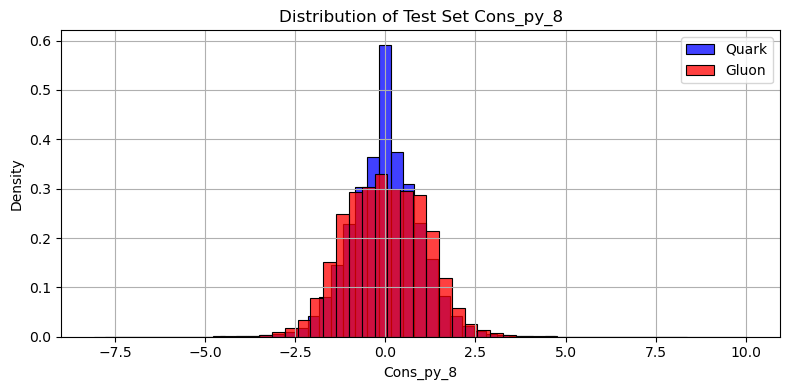

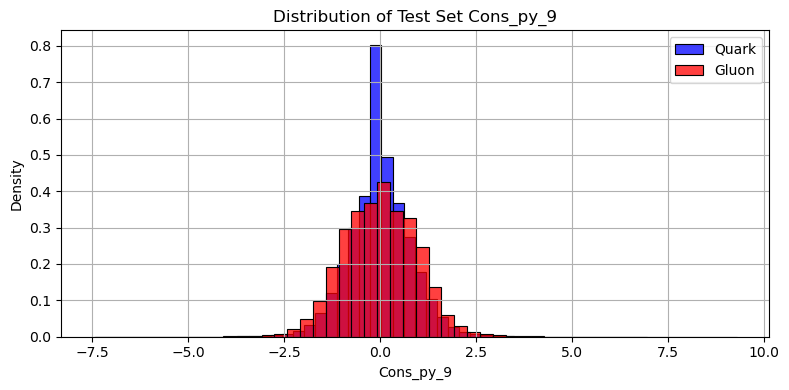

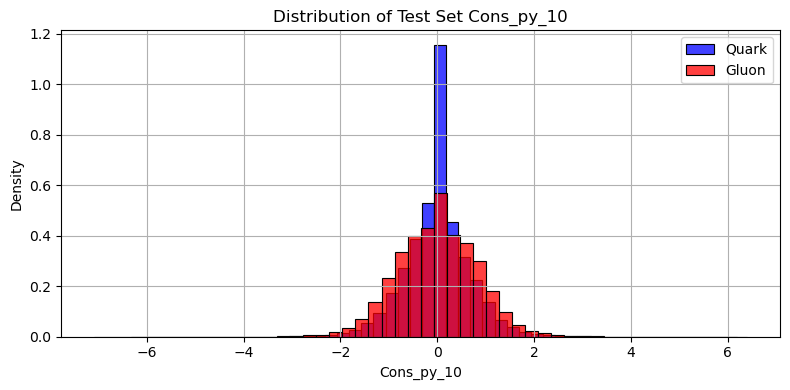

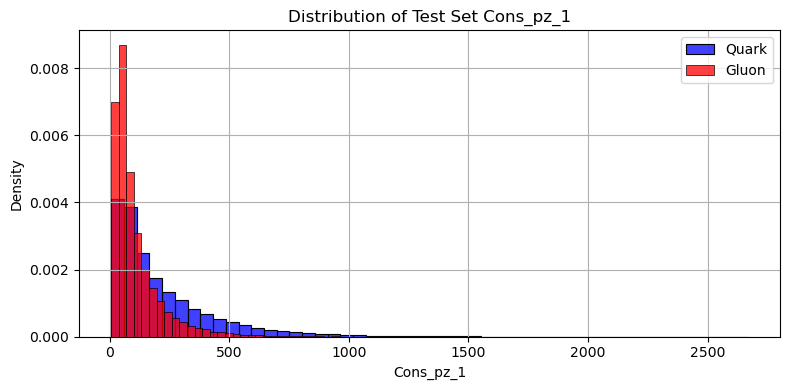

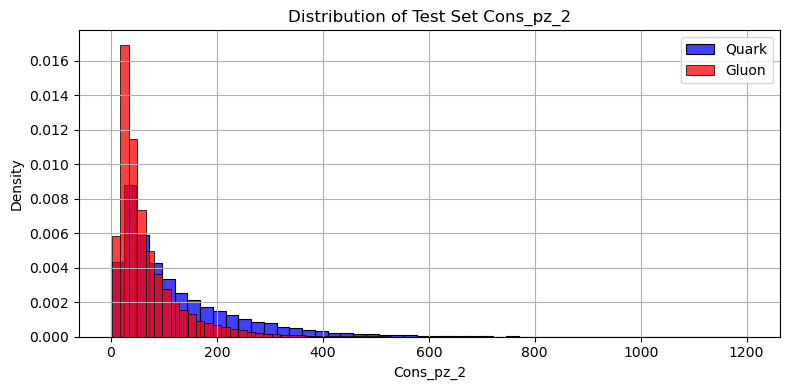

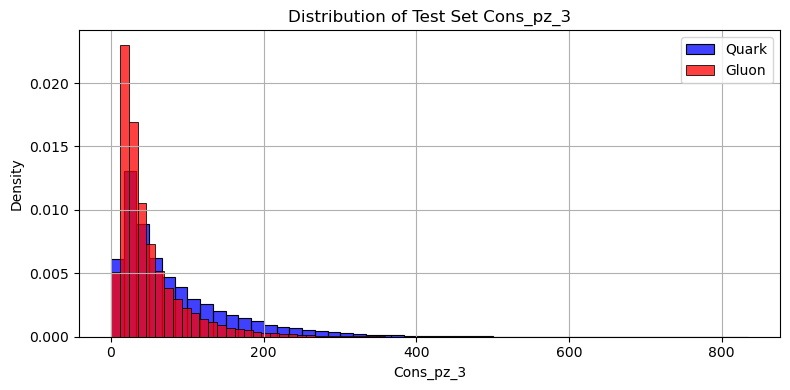

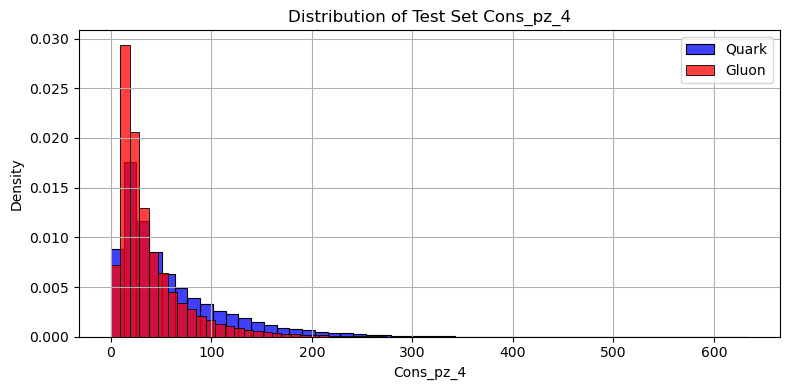

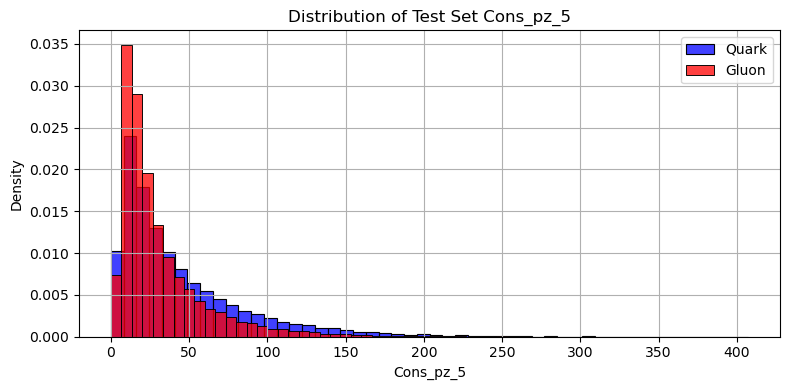

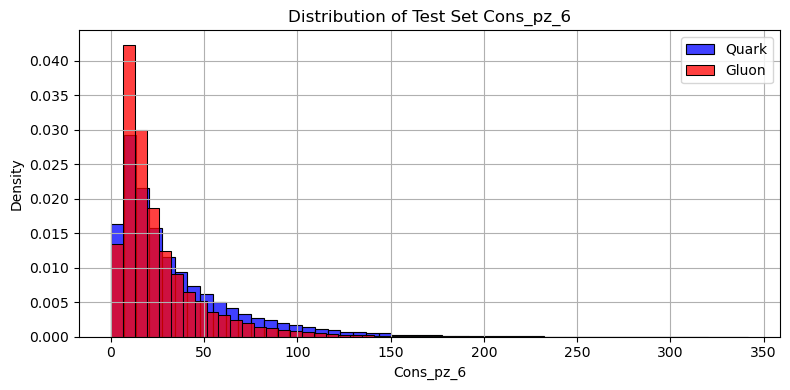

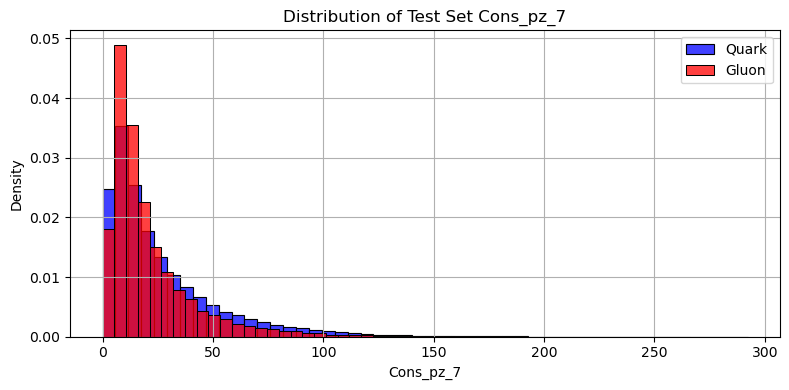

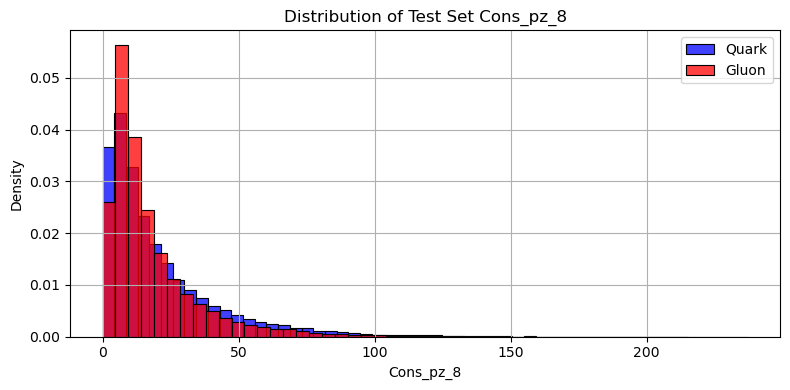

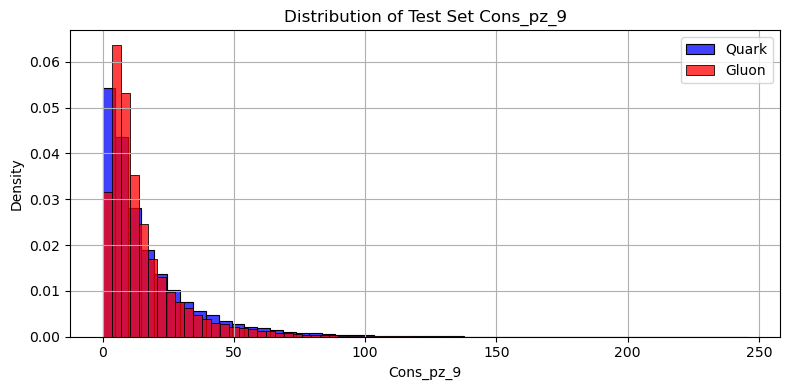

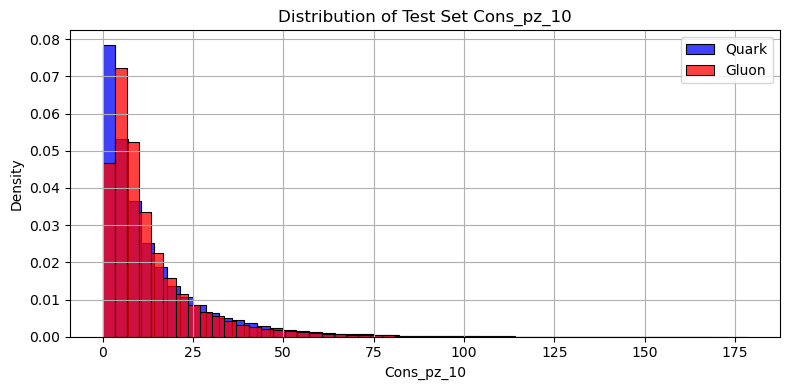

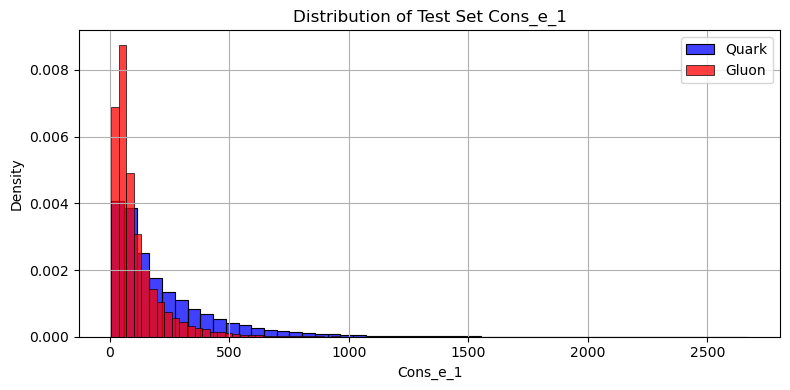

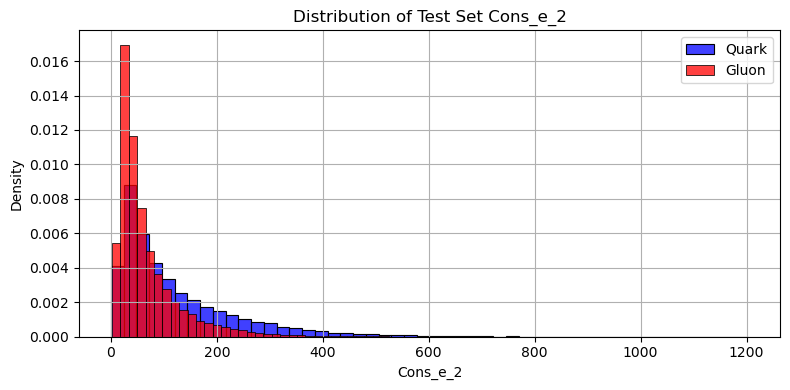

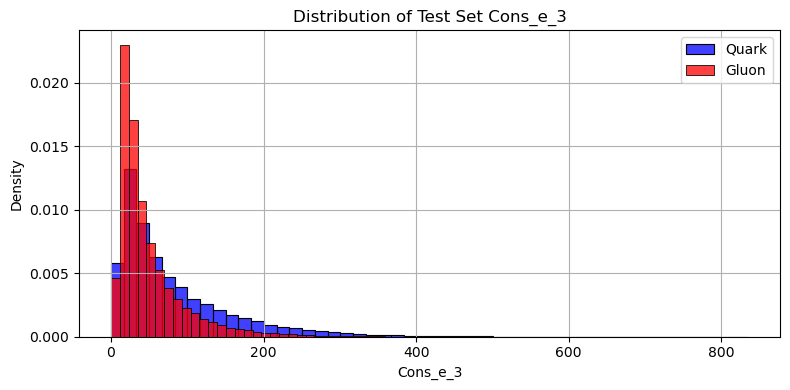

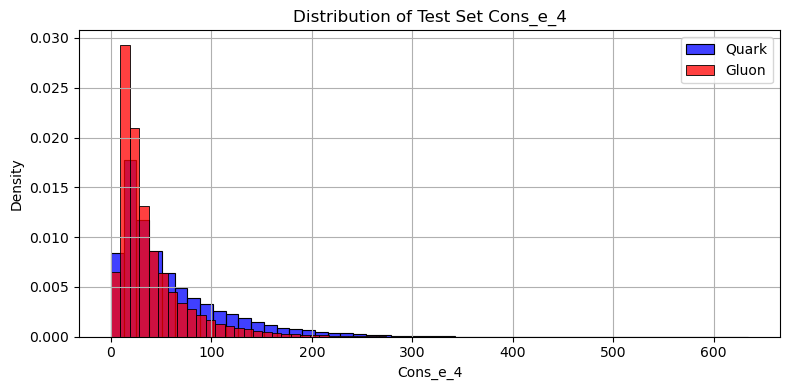

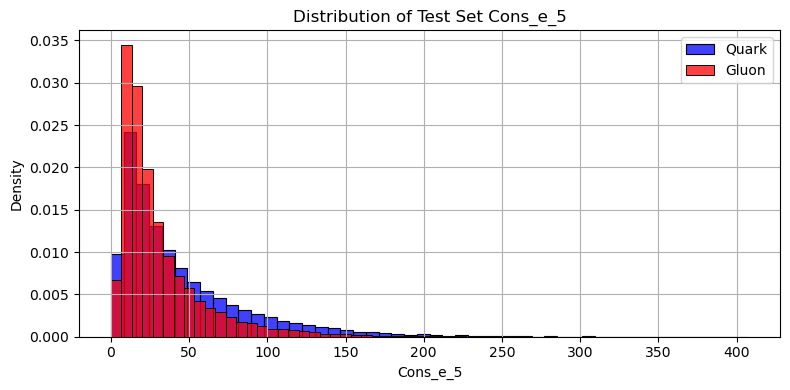

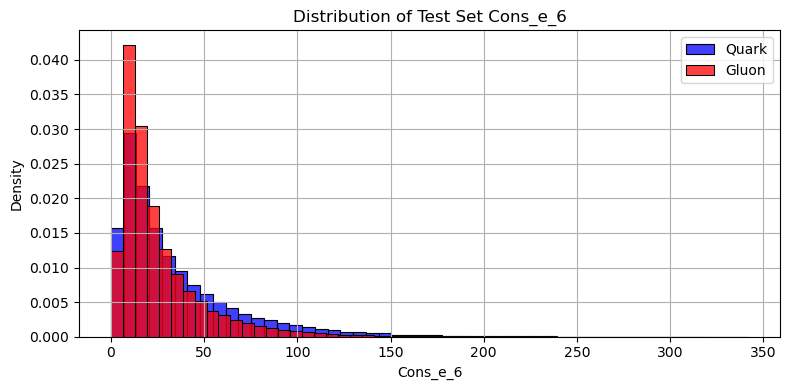

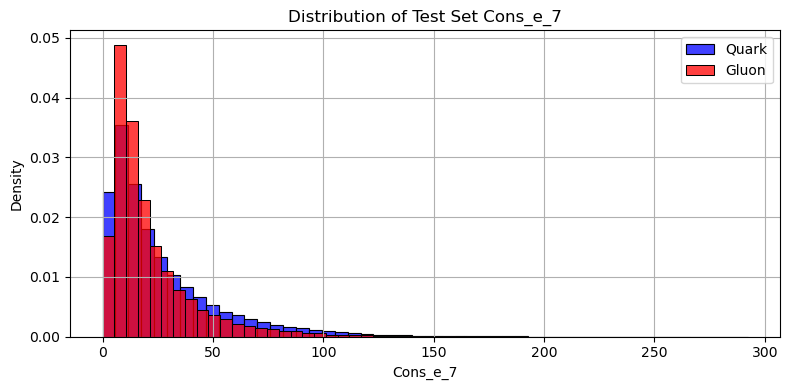

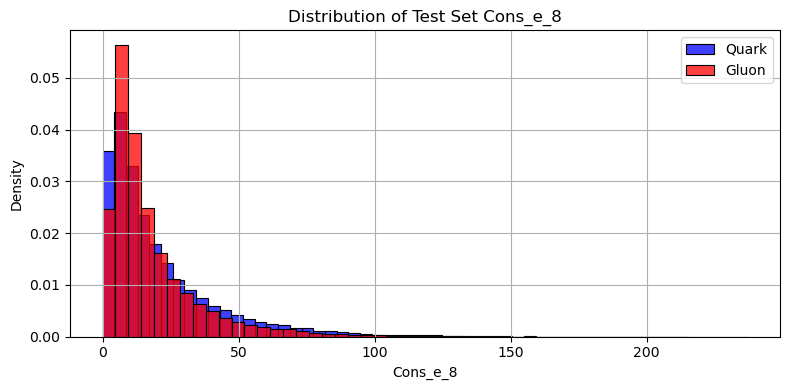

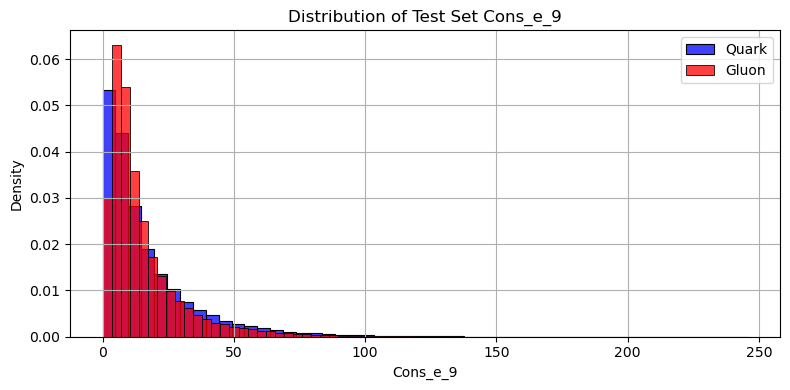

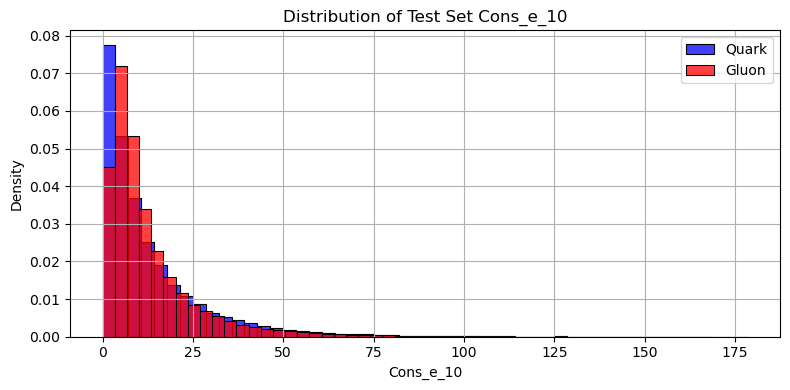

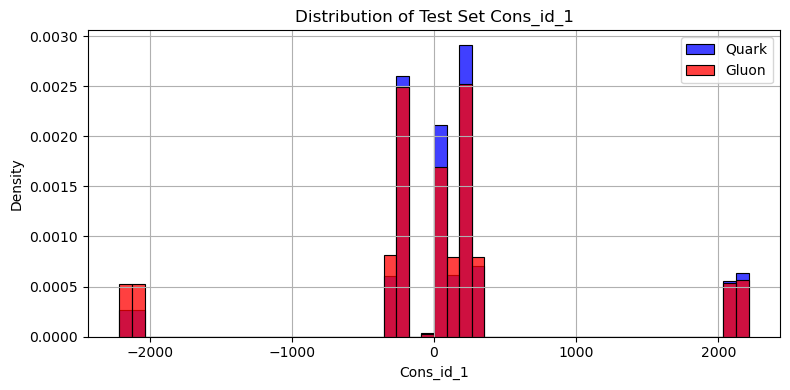

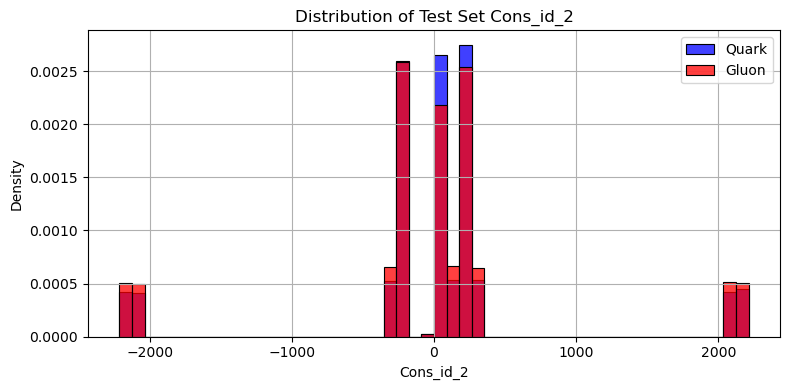

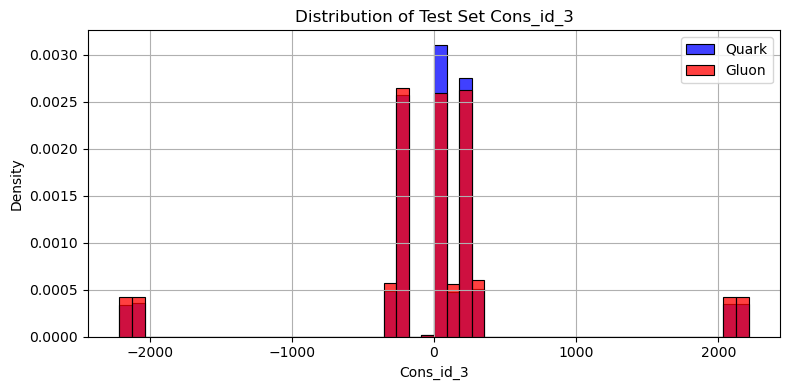

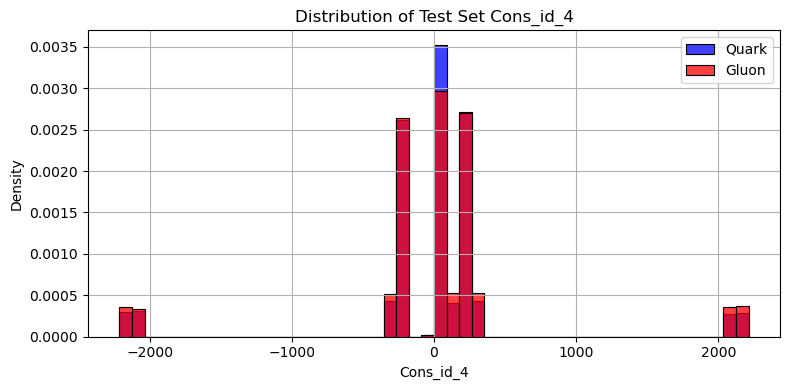

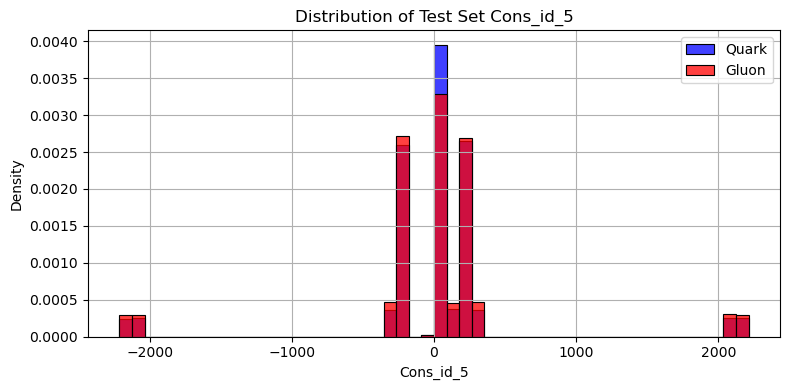

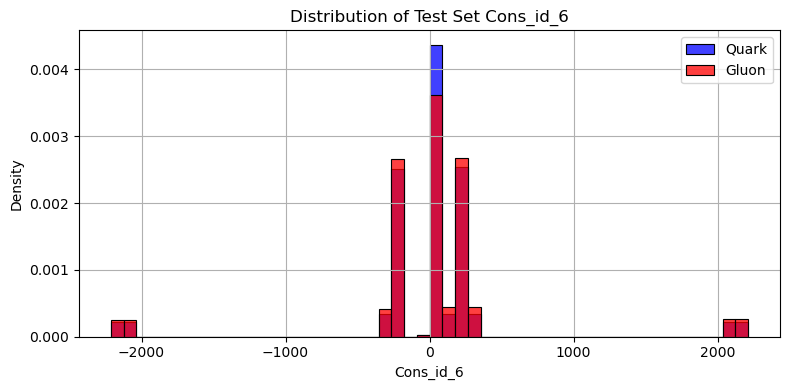

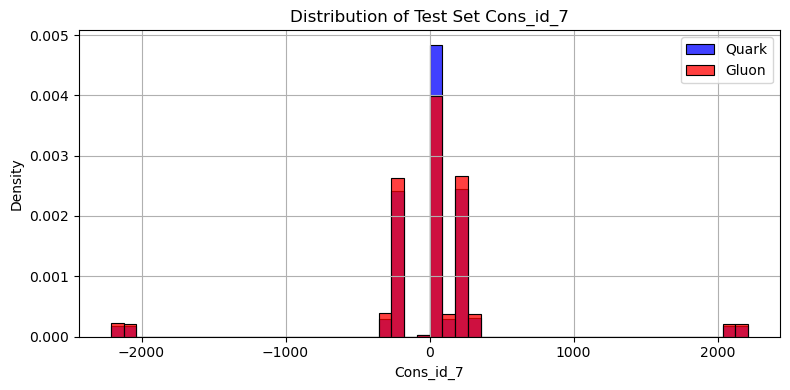

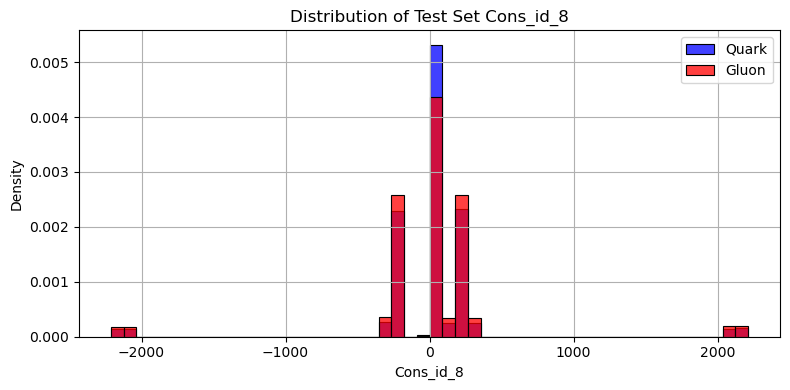

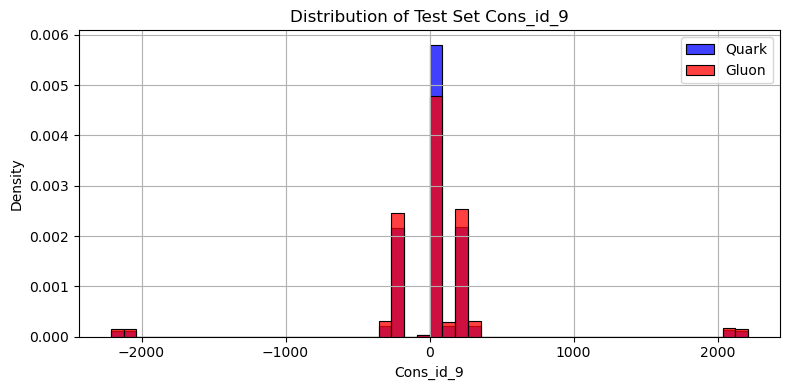

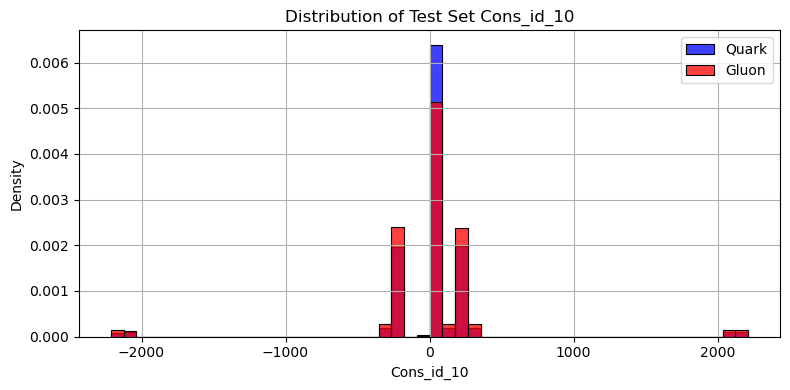

In [ ]:
# Loop through each feature and plot distribution for quark (1) and gluon (0)

features = list(X_test.columns)

df = X_test.copy()
df["label"] = y_test

# Define which features are integers
int_features = ["jet1_nCons", "jet1_nChargedCons"]

for feature in features:
    plt.figure(figsize=(8, 4))

    if feature in int_features:
        # Get min/max values to build proper integer bins
        min_val = int(df[feature].min())
        max_val = int(df[feature].max())
        bins = np.arange(min_val - 0.5, max_val + 1.5, 1)  # Bin edges centered on integers

        sns.histplot(data=df[df["label"] == 1], x=feature, color="blue", label="Quark",
                     stat="density", bins=bins, discrete=True)
        sns.histplot(data=df[df["label"] == 0], x=feature, color="red", label="Gluon",
                     stat="density", bins=bins, discrete=True)

    else:
        # Continuous features — use default binning
        sns.histplot(data=df[df["label"] == 1], x=feature, color="blue", label="Quark",
                     stat="density", bins=50)
        sns.histplot(data=df[df["label"] == 0], x=feature, color="red", label="Gluon",
                     stat="density", bins=50)

    plt.title(f"Distribution of Test Set {feature}")
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"/eos/user/k/kmonagha/BDT_models/plots/bdt_5_analysis/feature_distributions/{feature}_5_distribution.png", dpi=300)
    plt.show()